# Example 10b: Using the Leakage Assessment Workflow with the Analytical Reservoir and the Multisegmented Wellbore AI Components To Assess Leakage Risks in an NRAP-Open-IAM Control File Simulation.

This example demonstrates how to use the leakage assessment workflow in the control file interface. Specifically, this example examines the setup of the .yaml file for Control File Example 58e (ControlFile_ex58e.yaml) as well as the example's output. Slight changes have been made to the simulation; for example, the 'useDLmodel' parameter of the MultisegmentedWellboreAIO component has been changed from 1 to 0 to improve the simulation run time. The figures and .csv files produced show (1) reservoir pressures and CO$_2$ saturations over time, (2) brine and CO$_2$ leakage rates over time, and (3) masses of brine and CO$_2$ leaked over time.

This example uses the MultisegmentedWellboreAI component, a machine-learning wellbore leakage model with an improved performance (relative to the analytical MultisegmentedWellbore component). Because the files required for the MultisegmentedWellboreAI component are relatively large (3.6 GB), the files are not included in the download of NRAP-Open-IAM. To run this example, the user must download the required files from the following website:

https://edx.netl.doe.gov/dataset/phase-iii-nrap-open-iam

As of July 2024, the MultisegmentedWellboreAI files are contained in a file named 'MSWAI_Component_Files_April2024.zip'. In the future, this file name may change, with 'April2024' replaced to match the release date. If the file name changed, however, these instructions will still apply. Once the .zip file has been downloaded, its contents must be extracted and placed in the folder /src/openiam/components/models/wellbore/multisegmented_ai (where the /src folder is located in the main directory of the NRAP-Open-IAM installation). Even with the 'useDLmodel' parameter set to 0, some of the files are used by the component.

Note that before this example can be run, one needs to have the OpenIAMEnv environment activated (environment containing the python libraries required to run NRAP-Open-IAM). For example, one can open Anaconda Prompt, use the command "conda activate OpenIAMEnv" to activate the environment (if it is named OpenIAMEnv), navigate to the directory for NRAP-Open-IAM, and then use the command "jupyter notebook" to open Jupyter Notebook from that directory and within that environment. Then, the jupyter notebook examples will have access to the Python libraries within NRAP-Open-IAM environment.

This example uses a Python library called yamlmagic to read the input shown below (the code in the cells beneath the statement '%load_ext yamlmagic'). To install yamlmagic, open a command prompt (e.g., Anaconda Prompt), activate your NRAP-Open-IAM environment, type 'pip install yamlmagic', and hit enter. After yamlmagic is installed and your NRAP-Open-IAM environment is activated, then use the instructions above to open Jupyter Notebook. If the user wants to run this example but does not have yamlmagic installed, see the example 10a_iam_cfi_reservoir_mswai_leakage_assessment.ipynb. That example is similar to this one, but it does not use yamlmagic.

The material below is the Control File input. We discuss each section further below ('ModelParams', 'Stratigraphy', and 'Workflow').

In [1]:
# First, load yaml and yamlmagic
import yaml

%load_ext yamlmagic

Run the lines below to define the input for the control file. If you change the input, you need to rerun these lines for the changes to be registered.

In [2]:
%%yaml cfi_yaml_data

#-------------------------------------------------
ModelParams:
    EndTime: 20.0
    TimeStep: 1.0
    Analysis:
        type: lhs
        siz: 30
    Components: []
    OutputDirectory: 'output/output_ex58e_jupyter_yamlmagic'
    GenerateOutputFiles: True
    GenerateCombOutputFile: False
    Logging: Info
#-------------------------------------------------
Stratigraphy:
    numberOfShaleLayers:
        vary: False
        value: 3
    shale1Thickness:
        vary: False
        value: 250.0
    shale2Thickness:
        vary: False
        value: 250.0
    shale3Thickness:
        vary: False
        value: 250.0
    aquifer1Thickness:
        vary: False
        value: 100.0
    aquifer2Thickness:
        vary: False
        value: 100.0
    reservoirThickness:
        vary: False
        value: 30.0
#-------------------------------------------------
Workflow:
    Type: LeakageAssessment
    Options:
        PlotType: TimeSeriesStats      # Options are TimeSeries, TimeSeriesStats, or TimeSeriesAndStats
        FigureDPI: 100
        Subplot:
            Use: True                  # Specifies that the plots will use subplots
            NumCols: 2                 # Specifies that the plots will use two columns of subplots
        ReservoirComponentType: AnalyticalReservoir
        ReservoirOptions:
            InjectionWell:
                coordx: 0
                coordy: 0
            Parameters:
                injRate: 0.5
                reservoirRadius: 3000  # The wellbore locations used should not go beyond the radius of the AnalyticalReservoir
                logResPerm:
                    min: -14.0
                    max: -13.0
                    value: -13.5
                brineDensity: 1100     # The brineDesity values for the reservoir and wellbore components should match 
                brineResSaturation: 0.075
        WellboreComponentType: MultisegmentedWellboreAI
        WellboreOptions:
            Locations:                 # Locations input is required when using the LeakageAssessment Workflow
                coordx: [1000, 1500]
                coordy: [1000, 1500]
            Parameters:
                useDLmodel: 0          # 0 or 1, 1 is more computationally demanding
                wellRadius: 0.04
                logWellPerm:
                    min: -14.0
                    max: -13.0
                    value: -13.5
                logAquPerm:
                    min: -13.5
                    max: -12.5
                    value: -13.0
                brineDensity: 1100     # The brineDesity values for the reservoir and wellbore components should match 
        AquiferName: aquifer1

<IPython.core.display.Javascript object>

A standard NRAP-Open-IAM simulation has a modular design, allowing the user to insert different components, specify each component's outputs, and set up the connections between components. For example, a component connection allows a reservoir component to provide pressures and CO$_2$ saturations to a wellbore component. The standard, modular design of a system model allows considerable flexibility.

In contrast, a simulation using a Workflow does not require the user to handle all aspects of the system model's setup. Workflows are meant to serve as system model blueprints, automatically setting up the components, component connections, and outputs for a specific analysis. By automating such considerations, a workflow is meant to offer increased efficiency for frequently-performed analyses. For example, there is an area of review workflow that sets up a system model for an area of review analysis. In this example, a leakage assessment workflow is used to evaluate leakage risks at different locations near a geologic carbon storage site.

First, we review the different sections of the .yaml control file. Control files typically use the pound symbol followed by hyphens (#---) to mark separate sections, but these characters are not required. Any symbols following a pound symbol (#) will be ignored by the Python script that reads the .yaml file, so the hyphens are only there as a visual aid.

Every control file must have a section called 'ModelParams'. In this section, one specifies the model times to assess ('EndTime: 20.0' and 'TimeStep: 1.0', times are in years), the type of analysis to conduct (i.e., deterministic or stochastic, controlled by the 'Analysis' entry), the names of the components included in the system model ('Components'), and the output directory to save the output ('OutputDirectory').

Here, the analysis type is lhs ('type: lhs'), which stands for Latin Hypercube Sampling. This lhs simulation will use 30 stochastic realizations ('siz: 30'). Each entry is followed by a colon (:) followed by input. Some entries take a single input value (e.g., 'EndTime: 20.0'). Some entries have other entries indented beneath them; the indented entry is on a lower line and preceeded by an additional four spaces (e.g., 'type' and 'siz' are indented beneath 'Analysis').

Because the workflow handles the setup of each component, the 'Components' input (under 'ModelParams') is left as an empty list ('[]').

Because the entry 'GenerateOutputFiles' is given as True, all results will be saved to .csv files. The 'Logging' input of 'Info' specifies that information about the status of the simulation will be displayed and saved to a file ('IAM_log.log').

In [3]:
# This statement shows what was entered for the ModelParams section:
print('ModelParams: \n', yaml.dump(cfi_yaml_data['ModelParams']))

ModelParams: 
 Analysis:
  siz: 30
  type: lhs
Components: []
EndTime: 20.0
GenerateCombOutputFile: false
GenerateOutputFiles: true
Logging: Info
OutputDirectory: output/output_ex58e_jupyter_yamlmagic
TimeStep: 1.0



Next, the control file specifies the stratigraphy of the model domain. Higher unit numbers are closer to the surface and shales and aquifers always alternate. For example, shale 1 ('shale1Thickness') is above the reservoir ('reservoirThickness'), aquifer 1 ('aquifer1Thickness') is above shale 1, and shale 2 ('shale2Thickness') is above aquifer 1. The stratigraphy component type can portray flat-lying units (Stratigraphy), dipping units (DippingStratigraphy), or unit thicknesses interpolated from look up tables (LookupTableStratigraphy); here, flat-lying units are used.

Each unit thickness is given in meters with the 'value' entry under the corresponding parameter name (e.g., 'shale1Thickness', 'aquifer1Thickness', or 'reservoirThickness'). The entry 'vary: False' specifies that a parameter will not vary across different stochastic realizations; the parameter then has a fixed value.

In [4]:
# This statement shows what was entered for the Stratigraphy section:
print('Stratigraphy: \n', yaml.dump(cfi_yaml_data['Stratigraphy']))

Stratigraphy: 
 aquifer1Thickness:
  value: 100.0
  vary: false
aquifer2Thickness:
  value: 100.0
  vary: false
numberOfShaleLayers:
  value: 3
  vary: false
reservoirThickness:
  value: 30.0
  vary: false
shale1Thickness:
  value: 250.0
  vary: false
shale2Thickness:
  value: 250.0
  vary: false
shale3Thickness:
  value: 250.0
  vary: false



When using a standard control file setup, each component has its own section within the .yaml file. When using a workflow, however, the simulation options are entered under a 'Workflow' section. The Workflow section for this simulation is shown below. There are two main entries under 'Workflow': 'Type' and 'Options'. The workflow type (e.g., 'AoR', 'TTFD', 'LeakageAssessment') is given for the 'Type' entry. Here, 'Type' is given as 'LeakageAssessment'. All other inputs for the workflow are entered under 'Options'.

Under the 'Options' section, there is one input that is specific to the LeakageAssessment workflow type. That input is 'PlotType', which specifies the format of the time series plots automatically produced by the workflow. The 'PlotType' can be given as 'TimeSeries' (one line for each realization), 'TimeSeriesStats' (shaded distributions of results over time), or 'TimeSeriesAndStats' (both approaches used together). Here, 'PlotType' is given as 'TimeSeriesStats'.

In [5]:
# This statement shows what was entered for the Workflow Type:
print('Workflow Type:', yaml.dump(cfi_yaml_data['Workflow']['Type']))

# This statement shows what was entered for the PlotType:
print('Plot Type:', yaml.dump(cfi_yaml_data['Workflow']['Options']['PlotType']))

Workflow Type: LeakageAssessment
...

Plot Type: TimeSeriesStats
...



Under the 'Options' entry, there are two entries that specify the reservoir and wellbore component types to use: 'ReservoirComponentType' and 'WellboreComponentType', respectively. Here, the reservoir component type is given as AnalyticalReservoir while the wellbore component type is given as MultisegmentedWellboreAI. The inputs that would normally be entered in the reservoir and wellbore sections of the .yaml control file are instead entered under 'ReservoirOptions' and 'WellboreOptions'. For example, there are 'Parameters' sections entered under both 'ReservoirOptions' and 'WellboreOptions' - these parameter inputs will be given to the AnalyticalReservoir and MultisegmentedWellboreAI components, respectively.

In [6]:
# This statement shows what was entered for ReservoirComponentType:
print('Reservoir Component Type: ', yaml.dump(cfi_yaml_data['Workflow']['Options']['ReservoirComponentType']))

# This statement shows what was entered for WellboreComponentType:
print('Wellbore Component Type: ', yaml.dump(cfi_yaml_data['Workflow']['Options']['WellboreComponentType']))

Reservoir Component Type:  AnalyticalReservoir
...

Wellbore Component Type:  MultisegmentedWellboreAI
...



In [7]:
# This statement shows what was entered for ReservoirOptions:
print('Reservoir Options: \n', yaml.dump(cfi_yaml_data['Workflow']['Options']['ReservoirOptions']))

# This statement shows what was entered for WellboreOptions:
print('Wellbore Options: \n', yaml.dump(cfi_yaml_data['Workflow']['Options']['WellboreOptions']))

Reservoir Options: 
 InjectionWell:
  coordx: 0
  coordy: 0
Parameters:
  brineDensity: 1100
  brineResSaturation: 0.075
  injRate: 0.5
  logResPerm:
    max: -13.0
    min: -14.0
    value: -13.5
  reservoirRadius: 3000

Wellbore Options: 
 Locations:
  coordx:
  - 1000
  - 1500
  coordy:
  - 1000
  - 1500
Parameters:
  brineDensity: 1100
  logAquPerm:
    max: -12.5
    min: -13.5
    value: -13.0
  logWellPerm:
    max: -13.0
    min: -14.0
    value: -13.5
  useDLmodel: 0
  wellRadius: 0.04



Most of the parameters are given as fixed values (e.g., 'brineDensity: 1100'). Because this simulation uses a stochastic analysis type (Latin Hypercube Sampling), three of the parameters are set up to vary across the 30 realizations used: the logResPerm parameter of the AnalyticalReservoir, and the logWellPerm and logAquPerm parameters of the MultisegmentedWellboreAI component. These parameters are made to vary because they are given minimum ('min') and maximum ('max') values. The values for these parameters will be made to vary between the minimum and maximum values provided.

If a parameter is not given a value within the 'Parameters' section, that parameter will resort to its default value.

Here, the parameters given with fixed values (e.g., 'injRate', 'reservoirRadius', and 'wellRadius') are given inputs in the format of 'parameterName: parameterValue', where parameterName and parameterValue are the name and input value for each parameter. Note that this approach has the same effect as entering 'vary: False' and 'value: parameterValue' indented under the parameter name (as shown in the Stratigraphy section above).

The 'value' entry for a stochastic parameter is not used, but we suggest keeping the 'value' entry with an input that is within the range of the 'min' and 'max' inputs. If the user changed the simulation to a deterministic ('forward') analysis type and the 'value' entry was missing for a parameter, the simulation would encounter an error.

The 'Locations' input under 'WellboreOptions' contains information regarding the placement of the wellbores. The x (easting) and y (northing) coordinates are given in meters with the 'coordx' and 'coordy' entries under 'Locations'. These inputs are given as lists (in brackets, []), with a comma separating the values in each list. Here, two locations are specified. The first coordx value corresponds with the first coordy value, and the second coordx value corresponds with the second coordy value. Therefore, the first location is x = 1000 m, y = 1000 m and the second location is x = 1500 m, y = 1500 m.

Under 'ReservoirOptions', the location of the injection well is given under the 'InjectionWell' entry. The x ('coordx') and y ('coordy') values are given as 0 m and 0 m.

As discussed above, a standard control file would require the user to specify that the wellbore is connected to the reservoir. Otherwise, the wellbore would not receive pressure and CO$_2$ saturation inputs from the reservoir component. In a workflow, it is understood that the user wants the reservoir component to be connected to the wellbore component, and this connection is automatically created.

Similarly, because the LeakageAssessment workflow requires certain outputs (pressure, CO$_2$ saturation, brine and CO$_2$ leakage rates, and cumulative masses of leaked brine and CO$_2$), these outputs are automatically included for the reservoir and wellbore components. In a standard control file, the user would need to manually include each of these outputs.

The workflow results will focus on leakage into the aquifer specified with the 'AquiferName' entry (given under the 'Options'). Here, 'AquiferName' is given as 'aquifer1'. Therefore, the results will focus on the leakage of brine and CO$_2$ into aquifer 1.

In [8]:
# This statement shows what was entered for AquiferName:
print('Aquifer Name: ', yaml.dump(cfi_yaml_data['Workflow']['Options']['AquiferName']))

Aquifer Name:  aquifer1
...



In a standard control file setup, the user must also create a separate 'Plots' section that specifies all of the figures to be created. In a workflow, the figure inputs are handled automatically. The LeakageAssessment workflow creates time series plots showing reservoir pressures, CO$_2$ saturations, brine and CO$_2$ leakage rates, and cumulative masses of leaked brine and CO$_2$.

Because the 'FigureDPI' entry (under 'Options') is given as 100, the figures created will have a DPI (dots per inch) of 100. Higher DPI values (200 or 300) would allow for figures with higher resolution, but the file sizes would be much larger. The 'Subplot' entry (under 'Options') is used to set the handling of subplots in the plots created. The entries 'Use' and 'NumCols' are indented under 'Subplot'. Because 'Use' is set to True and 'NumCols' is set to 2, the plots will use subplots (one for each wellbore location) and the subplots will be arranged in two columns.

In [9]:
# This statement shows what was entered for the FigureDPI:
print('FigureDPI: ', yaml.dump(cfi_yaml_data['Workflow']['Options']['FigureDPI']))

# This statement shows what was entered for Subplot:
print('Subplot: \n', yaml.dump(cfi_yaml_data['Workflow']['Options']['Subplot']))

FigureDPI:  100
...

Subplot: 
 NumCols: 2
Use: true



The code below will run the simulation. Note that this simulation take some time to run (e.g., about seven minutes; setting 'useDLmodel' to 1 could cause the simulation to take about 30 minutes). The output will be saved to a folder called 'output_ex58e_jupyter' in the 'output' folder of the NRAP-Open-IAM directory. The control file interface will print messages regarding the status of the simulation (e.g., 'Running file' or 'Analysis completed').

Because this is a stochastic simulation, the simulation will print 'Progress: ... X of 30 samples completed'. Here, X is the number of realizations that have been completed (out of 30, the total realizations specified with 'siz: 30' in the 'ModelParams' section above).

After the main simulation is complete, the LeakageAssessment workflow will continue to create figures. The figures will be placed in the 'output_58e_jupyter' folder in the output directory of the NRAP-Open-IAM installation. Once the LeakageAssessment workflow has finished, the code below will print the statement 'Finished'.

In [10]:
import sys
import os

source_dir = os.path.join('..', '..', 'src')

# Save yaml data into file to be run
example_directory = os.path.join(os.getcwd(), '..', 'user', 'examples_for_jupyter_notebook')

if not os.path.exists(example_directory):
    os.mkdir(example_directory)

file_name = os.path.join(example_directory, 'ControlFile_ex58e_jupyter_yamlmagic.yaml')

# Write the .yaml file so it can be read by openiam_cf.py
with open(file_name, 'w') as f:
    yaml.dump(cfi_yaml_data, f)

# Path to the file openiam_cf.py, which is used to run control files
run_file = os.path.join(source_dir, 'openiam', 'components', 'openiam_cf.py')

# Set up the command to run the control file
run_command = '"{0}" --file "{1}"'.format(
     run_file, file_name)

In [11]:
print('Running Control File example 58e...')

# Run the control file
%run -i $run_command

print('Finished.')

Running Control File example 58e...



INFO     
NRAP-Open-IAM version: beta_1.1.0-24.07.30
Runtime: 2024-08-07_15.05.46 

INFO     
Running file C:\UserDATA\NRAP\NRAP_Open_IAM\Pip_NRAP_Open_IAM_Dev\examples\Jupyter_notebooks\..\user\examples_for_jupyter_notebook\ControlFile_ex58e_jupyter_yamlmagic.yaml



Progress: [------------------->] 100% 30 of 30 samples completed


INFO     
Analysis completed at 2024-08-07_15.12.33.
Total run time: 0:06:46.575727 

INFO     
Simulation results and plots can be found in the output folder: 
C:\UserDATA\NRAP\NRAP_Open_IAM\Pip_NRAP_Open_IAM_Dev\output/output_ex58e_jupyter_yamlmagic


Finished.


The LeakageAssessment workflow will create six figures. You can check the output folder ('output_ex58e_jupyter') to see when the figures are produced. If the figures have been produced, the code below loads four of the figures. Otherwise, it will print a statement saying that the figure could not be found.

The figure 'Pressure_Plot.png' shows the distribution of pressure results (mean, median, and four quartiles) across the 30 different realizations. Two subplots are used for the two wellbore locations entered ('coordx' and 'coordy', under 'Locations'). The figure legends specify which suplot corresponds to which location ('location 0' and 'location 1', using 0-based indexing).

The figure 'CO2_Sat_Plot.png' shows CO$_2$ saturations at the two wellbore positions used. Because of the parameterization of the AnalyticalReservoir component, the CO$_2$ saturations will not vary across the 30 realizations. The time series plot will therefore appear to have one line for each subplot (i.e., the mean, median, and shaded distributions follow the same values).

The figures 'Mass_Brine_Plot.png' and 'Mass_CO2_Plot.png' show the distributions of cumulative brine and CO$_2$ masses leaked into aquifer 1 at the two wellbore locations, respectively.

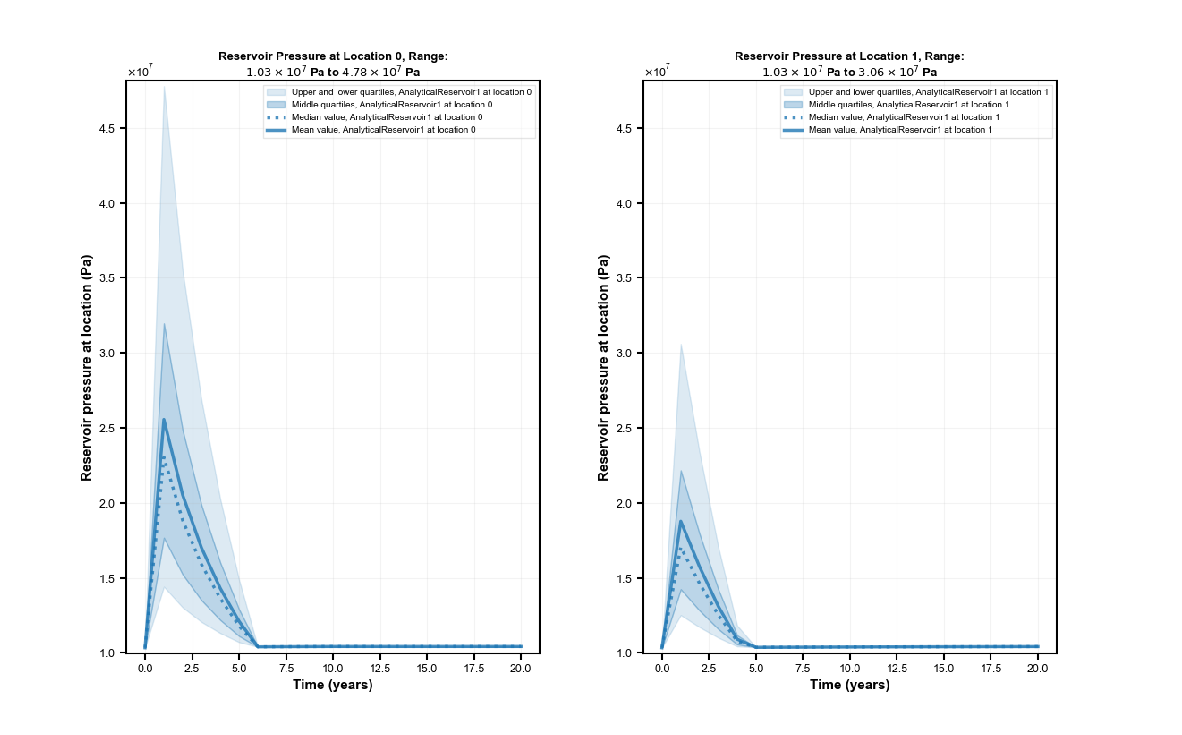

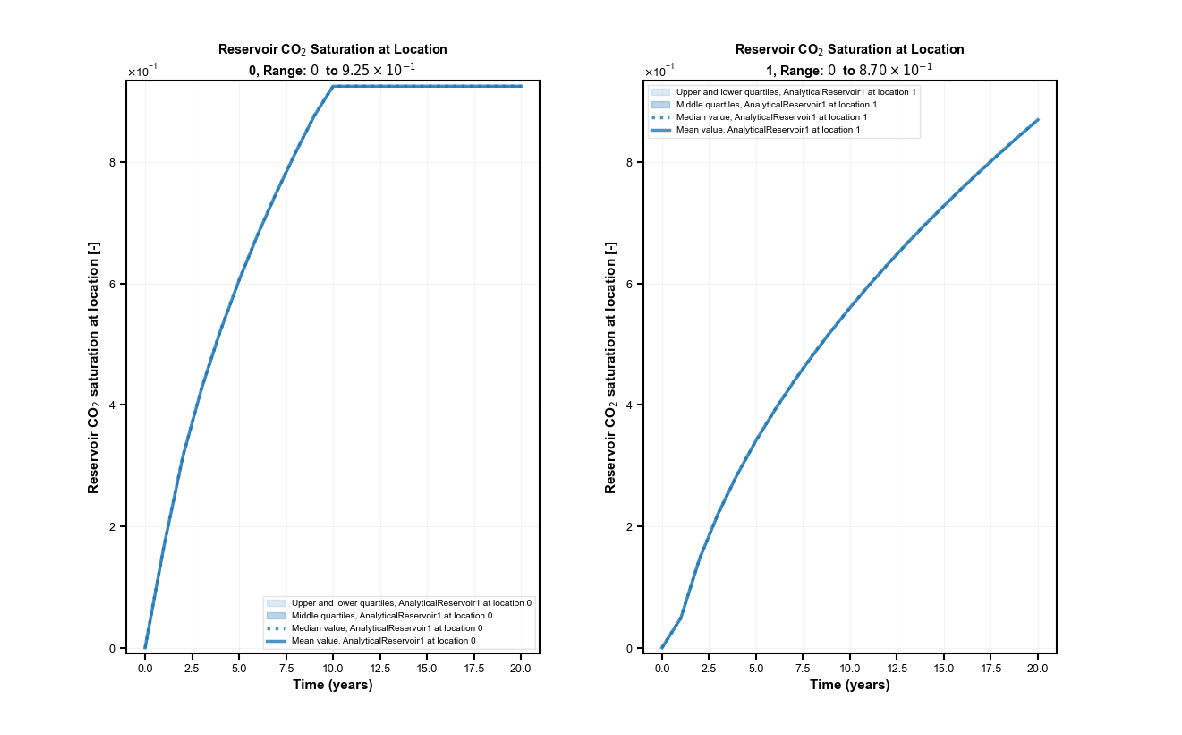

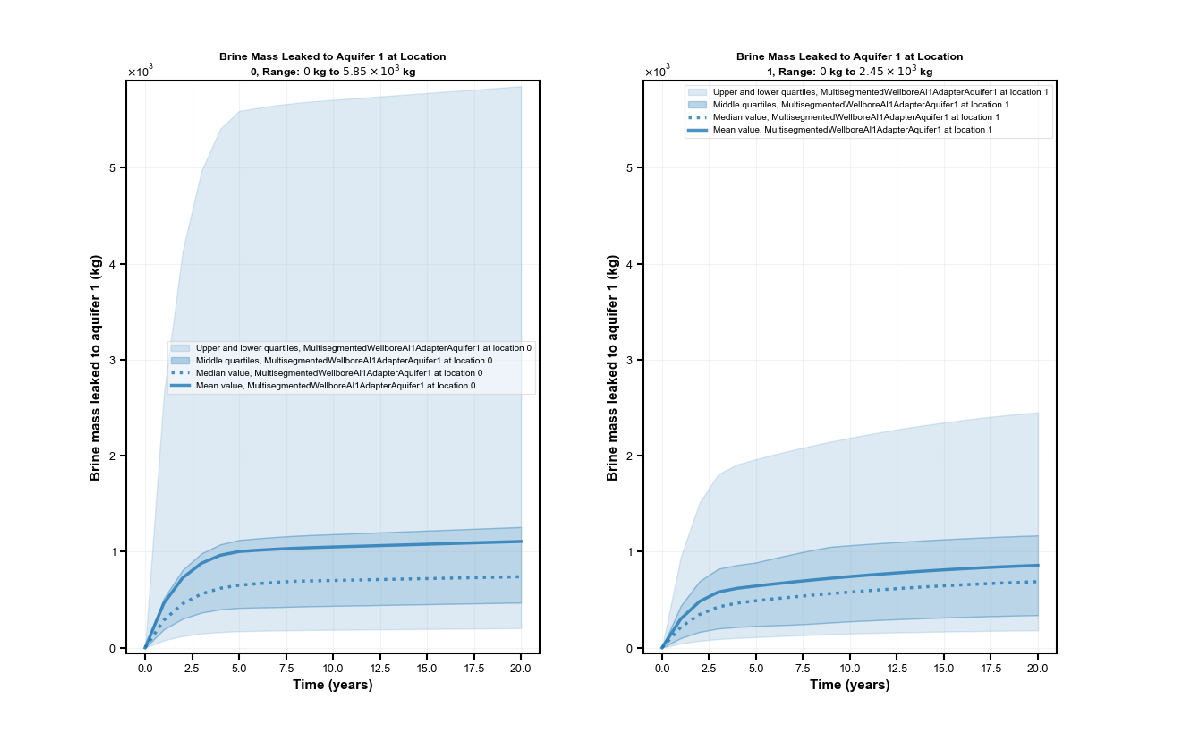

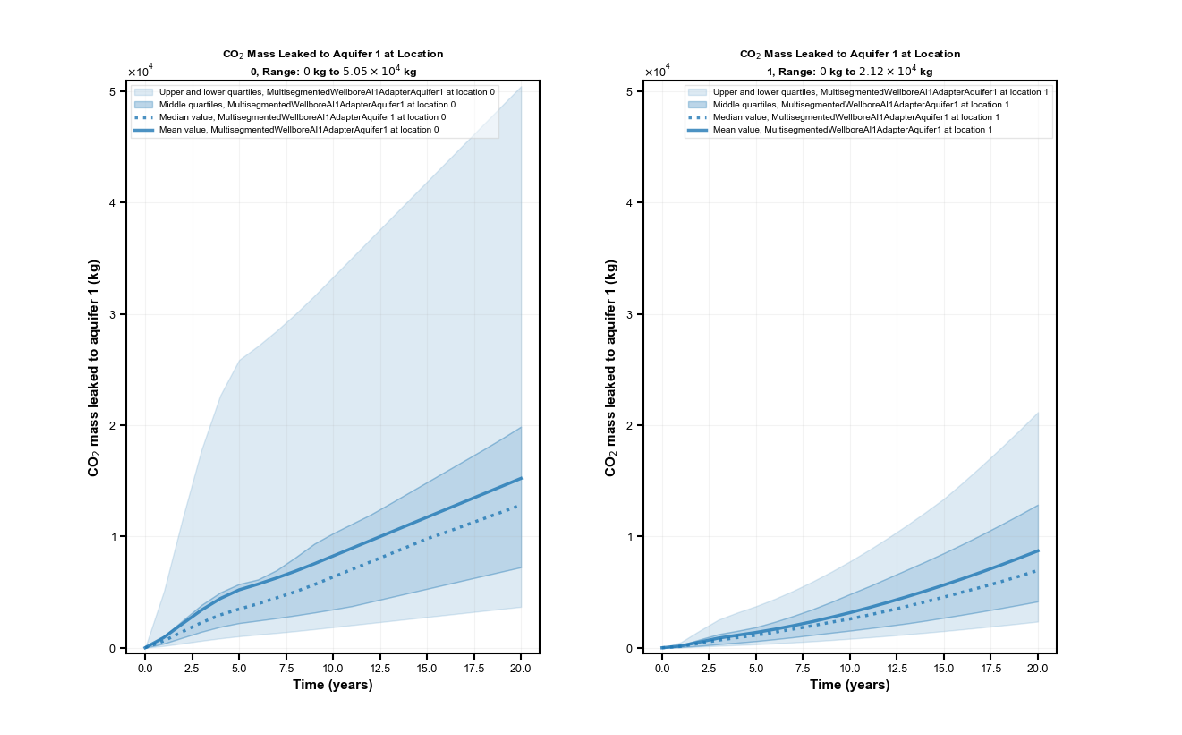

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

figure_names = ['Pressure_Plot.png', 'CO2_Sat_Plot.png',
                'Mass_Brine_Plot.png', 'Mass_CO2_Plot.png']

example_output_directory = os.path.join(os.getcwd(), '..', '..', 'output', 'output_ex58e_jupyter_yamlmagic')

# If you change the FigureDPI entry above, also change this variable to match. Suggested values are 100, 200, and 300.
FigureDPI = 100

for figRef in range(len(figure_names)):
    file_path = os.path.join(example_output_directory, figure_names[figRef])
    
    check_for_figure = os.path.exists(file_path)
    
    if check_for_figure:
        img = mpimg.imread(file_path)
        
        fig = plt.figure(figRef + 1, figsize=(15, 12), dpi=FigureDPI)
        ax = plt.gca()
        
        ax.imshow(img, interpolation='nearest')
        
        # We do not need the ticks from imshow, the figure file has its own ticks
        ax.axes.get_xaxis().set_ticks([])
        ax.axes.get_yaxis().set_ticks([])
        
        # We also do not need the spline added by imshow
        plt.setp(ax.spines.values(), alpha = 0)
    else:
        print('The figure {} was not found.'.format(file_path))

plt.show()

You can change the inputs entered under the statement '%%yaml cfi_yaml_data' and rerun this example to see the resulting changes. For example, you can change the injection rate parameter 'injRate' shown under 'ReservoirOptions: Parameters'. The allowed range of 'injRate' values is 0.0024 m$^3$ s$^{-1}$ to 3.776 m$^3$ s$^{-1}$. You could also change the permeability parameters of the reservoir component ('logResPerm') and wellbore component ('logWellPerm' and 'logAquPerm'). Additionally, you can change the FigureDPI value used; a higher FigureDPI (e.g., 300 vs default of 100) will allow for higher resolution figures, but the files will have larger sizes. To change the FigureDPI, change the entry in the Workflow: Options section ('FigureDPI: 100') and also change the FigureDPI variable in the code above.

Overall, the LeakageAssessment workflow can be used to quickly and easily examine the leakage risks at different locations near a geologic carbon storage site.